In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.metrics import *
from tensorflow.keras import regularizers
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import load_img

# For Data Processing
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt

# Miscellaneous
import os
import random

# Turn off warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
TRAIN_SIZE = 384
INFERENCE_SIZE = 224

In [ ]:
main_dir = '/content/drive/MyDrive/images/test/'
all_image_paths = [main_dir+file for file in os.listdir(main_dir) if file.endswith('.jpg')]

print('Total number of images:', len(all_image_paths))

Total number of images: 4


In [ ]:
len(all_image_paths)

4

In [ ]:
train_image_paths = all_image_paths[:600]
test_image_paths = all_image_paths[:600]

In [ ]:
len(train_image_paths)

4

In [ ]:
len(test_image_paths)

4

In [ ]:
def open_images(paths, size=TRAIN_SIZE):
    images = []
    for path in paths:
        image = load_img(path, target_size=(size, size, 3))
        image = np.array(image)/255.0
        images.append(image)
    return np.array(images)

In [ ]:
def add_noise(images, amount=0.1):


    noise = np.random.normal(0, amount, images.shape[0]*images.shape[1]*images.shape[2]*images.shape[3]).reshape(images.shape)

    noise_img = images+noise
    return noise_img

In [ ]:
open_images([train_image_paths[2]])

array([[[[0.41568627, 0.42745098, 0.39215686],
         [0.4627451 , 0.4745098 , 0.43921569],
         [0.38823529, 0.41176471, 0.37254902],
         ...,
         [0.1254902 , 0.24313725, 0.34509804],
         [0.1254902 , 0.24313725, 0.34509804],
         [0.1372549 , 0.24313725, 0.36078431]],

        [[0.49803922, 0.51764706, 0.49411765],
         [0.46666667, 0.49411765, 0.46666667],
         [0.4745098 , 0.50196078, 0.47058824],
         ...,
         [0.13333333, 0.26666667, 0.37647059],
         [0.1372549 , 0.25882353, 0.38039216],
         [0.13333333, 0.25490196, 0.37647059]],

        [[0.65490196, 0.69411765, 0.69019608],
         [0.65882353, 0.69803922, 0.69411765],
         [0.67058824, 0.70588235, 0.70196078],
         ...,
         [0.18823529, 0.3372549 , 0.48235294],
         [0.18039216, 0.32941176, 0.4745098 ],
         [0.18039216, 0.32941176, 0.4745098 ]],

        ...,

        [[0.28235294, 0.29411765, 0.22745098],
         [0.27843137, 0.29019608, 0.22352941]

In [ ]:
image = open_images([train_image_paths[3]])

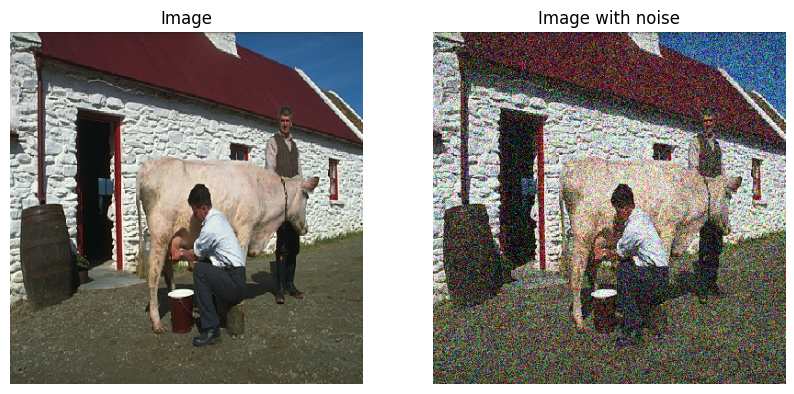

In [ ]:
image = open_images([train_image_paths[2]])
noise_img = add_noise(image, amount=0.2)

fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.title('Image')
plt.imshow(image[0])

fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.title('Image with noise')
plt.imshow(noise_img[0])

plt.show()

In [ ]:
def datagen(paths, size=TRAIN_SIZE, batch_size=5):

    for x in range(0, len(paths), batch_size):
        batch_paths = paths[x:x+batch_size]
        batch_images = open_images(batch_paths, size=size)
        amount = random.uniform(0,0.2)
        noise_images = add_noise(batch_images, amount=amount)
        yield noise_images, batch_images

In [ ]:
image = Input(shape=(None,None,3))

# Encoder
l1 = Conv2D(32, (3,3), padding='same', activation='relu',
            activity_regularizer=regularizers.l1(10e-10))(image)
l2 = Conv2D(32, (3,3), padding='same', activation='relu',
            activity_regularizer=regularizers.l1(10e-10))(l1)

l3 = MaxPooling2D(padding='same')(l2)
l3 = Dropout(0.3)(l3)
l4 = Conv2D(64, (3,3), padding='same', activation='relu',
            activity_regularizer=regularizers.l1(10e-10))(l3)
l5 = Conv2D(64, (3,3), padding='same', activation='relu',
            activity_regularizer=regularizers.l1(10e-10))(l4)

l6 = MaxPooling2D(padding='same')(l5)
l7 = Conv2D(128, (3,3), padding='same', activation='relu',
            activity_regularizer=regularizers.l1(10e-10))(l6)

#Decoder
l8 = UpSampling2D()(l7)
l9 = Conv2D(64, (3,3), padding='same', activation='relu',
           activity_regularizer=regularizers.l1(10e-10))(l8)
l10 = Conv2D(64, (3,3), padding='same', activation='relu',
            activity_regularizer=regularizers.l1(10e-10))(l9)

l11 = add([l5,l10])
l12 = UpSampling2D()(l11)
l13 = Conv2D(32, (3,3), padding='same', activation='relu',
            activity_regularizer=regularizers.l1(10e-10))(l12)
l14 = Conv2D(32, (3,3), padding='same', activation='relu',
            activity_regularizer=regularizers.l1(10e-10))(l13)

l15 = add([l14,l2])

decoded = Conv2D(3, (3,3), padding='same', activation='relu',
                activity_regularizer=regularizers.l1(10e-10))(l15)
model = Model(image, decoded)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, None, None, 32)       896       ['input_2[0][0]']             
                                                                                                  
 conv2d_11 (Conv2D)          (None, None, None, 32)       9248      ['conv2d_10[0][0]']           
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, None, None, 32)       0         ['conv2d_11[0][0]']           
 g2D)                                                                                       

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.0001),
             loss='binary_crossentropy')

In [ ]:
batch_size=3
steps = int(len(train_image_paths)/batch_size)
epochs = 3
for epoch in range(epochs):
    model.fit(datagen(train_image_paths, size=TRAIN_SIZE, batch_size=batch_size), epochs=3, steps_per_epoch=steps)

Epoch 1/3
1/1 [==============================] - 10s 10s/step - loss: 2.7021
Epoch 2/3
1/1 [==============================] - 3s 3s/step - loss: 3.2166
Epoch 3/3


1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00
Epoch 1/3
1/1 [==============================] - 10s 10s/step - loss: 2.5748
Epoch 2/3
1/1 [==============================] - 3s 3s/step - loss: 3.1159
Epoch 3/3


1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00
Epoch 1/3
1/1 [==============================] - 7s 7s/step - loss: 1.8442
Epoch 2/3
1/1 [==============================] - 4s 4s/step - loss: 0.8866
Epoch 3/3


1/1 [==============================] - 0s 43ms/step - loss: 0.0000e+00


In [ ]:
batch_size=3
steps = int(len(test_image_paths)/batch_size)
model.evaluate(datagen(test_image_paths, size=INFERENCE_SIZE, batch_size=batch_size), steps=steps)

1/1 [==============================] - 1s 926ms/step - loss: 0.7770


0.777022123336792

1/1 [==============================] - 2s 2s/step


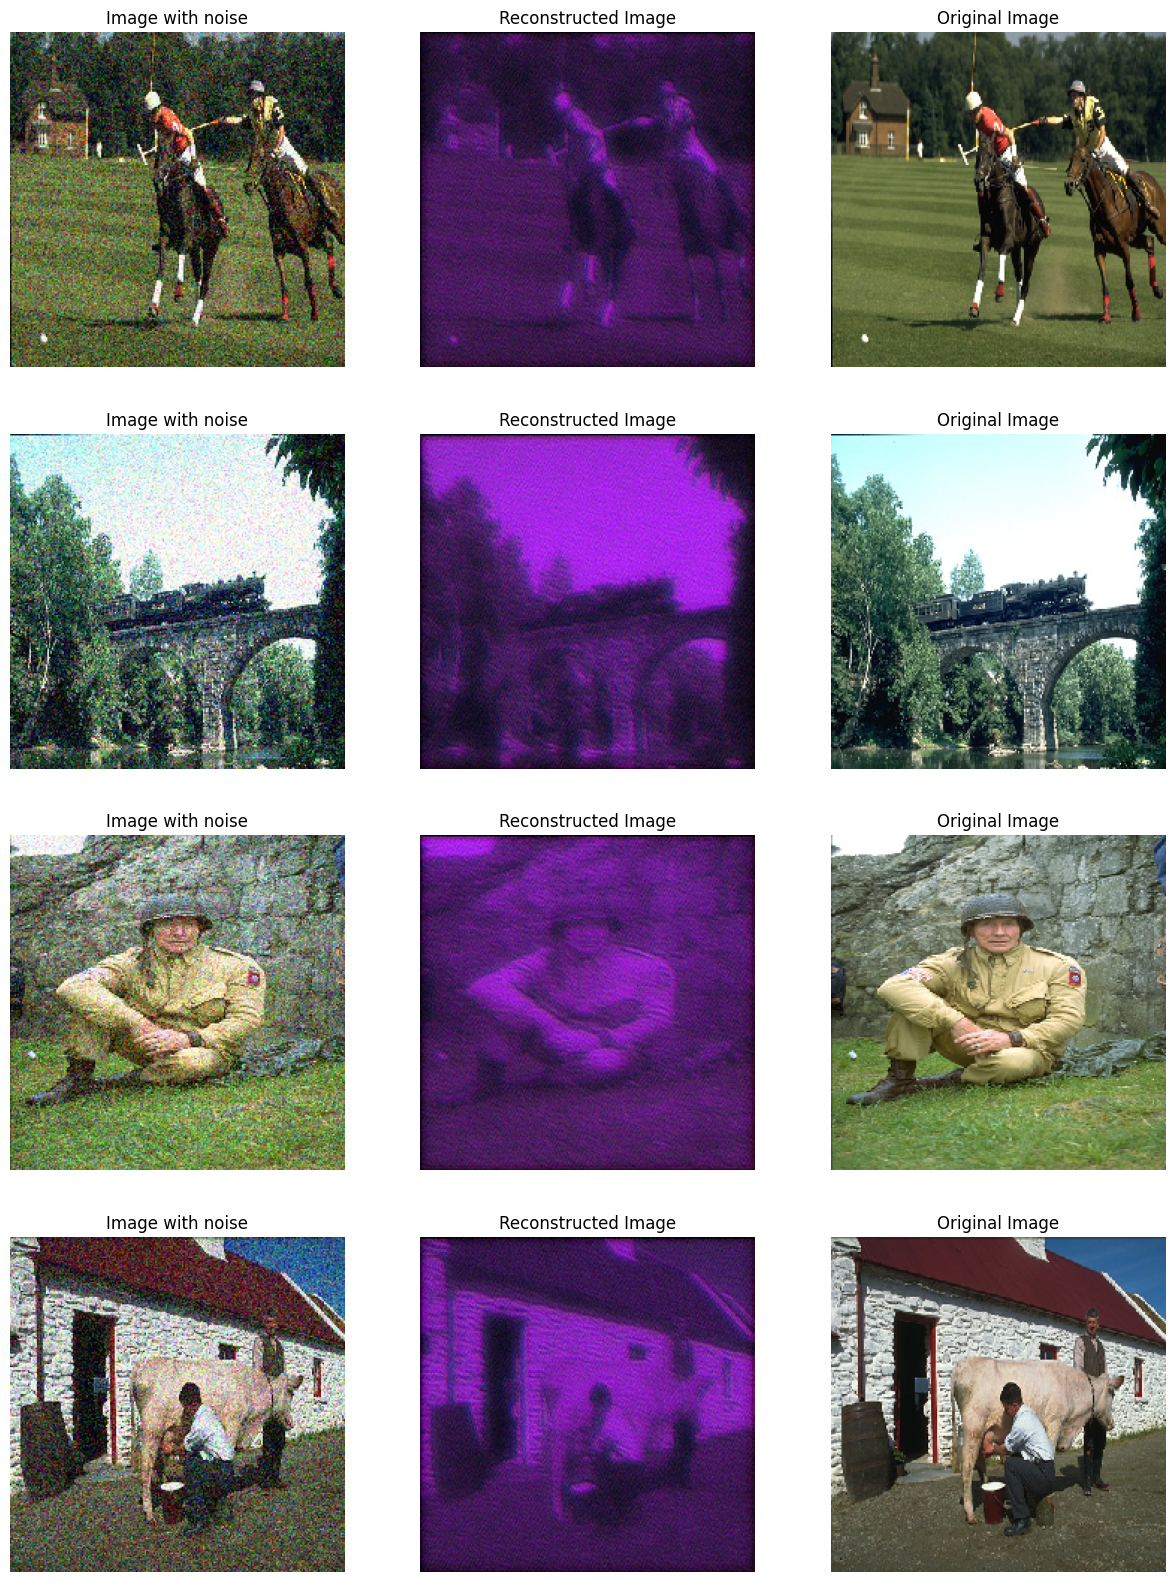

In [ ]:
def plot_results(noise_image, reconstructed_image, image):
    w = 15
    h = len(noise_image)*5
    fig = plt.figure(figsize=(w, h))
    columns = 3
    rows = len(noise_image)
    for i in range(1, rows*columns, columns):
        fig.add_subplot(rows, columns, i)
        plt.axis('off')
        plt.title('Image with noise')
        plt.imshow(noise_images[int((i-1)/columns)])

        fig.add_subplot(rows, columns, i+1)
        plt.axis('off')
        plt.title('Reconstructed Image')
        plt.imshow(reconstructed[int((i-1)/columns)])

        fig.add_subplot(rows, columns, i+2)
        plt.axis('off')
        plt.title('Original Image')
        plt.imshow(images[int((i-1)/columns)])

    plt.show()

batch_size = 4

paths = random.sample(test_image_paths, batch_size)
images = open_images(paths, size=INFERENCE_SIZE)
# Amount of noise = random value between 0.1 and 0.15
amount = random.uniform(0.1,0.15)
noise_images = add_noise(images, amount=amount)
reconstructed = model.predict(noise_images)

plot_results(noise_images, reconstructed, images)